# Download dataset with Pytorch



## Load the data

In [ ]:
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
from PIL import Image


# Define transformation for each image
transform  = transforms.Compose([
    transforms.Lambda(lambda x: np.array(x).flatten()) #Stretch image into row [32,32,3] -> [3072]
])

# Download a CIFAR10 dataset
dataset = datasets.CIFAR10("content",
                           train=True,
                           transform = transform,
                           download=True)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting content/cifar-10-python.tar.gz to content


## Split dataset & define dataloaders

torch.Size([256, 3072]) torch.Size([256])


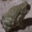

6

In [ ]:
train_ds, val_ds, _= random_split(dataset, [20000,1000 ,29000])
batch_size = 256

train_loader = DataLoader(train_ds, batch_size = batch_size)
val_loader = DataLoader(val_ds, batch_size = batch_size)

# Display one image
for images, class_nums in train_loader:
  print (images.shape,class_nums.shape) # class_nums are tensor!
  display(Image.fromarray(images[0].reshape((32,32,3)).numpy()),class_nums[0].item()) 
  break 


# Implement LinearClassifier class for CIFAR10

In [ ]:
class LinearClassifier:
  def __init__(self, labels, ):
    self.labels = labels
    self.classes_num = len(labels)
    self.W = np.random.randn(3072, self.classes_num) * 0.0001
    self.batch_size = 200

  
  def train(self, x_batch, y_batch, learning_rate = 1e-8):
    """
      Arguments:
        x  (numpy.array): collection of objects (batch)
        y  (numpy.array): collection of integer 
        representing a class number for objects from x
    
    """
    loss_val, grad = self.loss(x_batch, y_batch)
    self.W += -learning_rate * grad # update weights
    return loss_val/x_batch.shape[0]
      
  def loss(self, x, y):
    """
      Arguments:
        x  (numpy.array): collection of objects (batch)
        y  (numpy.array): collection of integer 
        representing a class number for objects from x

    """
    # calculate bias
    probabilities = np.dot(x, self.W)
    real_values = probabilities[range(x.shape[0]), list(y)].reshape(-1, 1)
    bias = np.maximum(0, probabilities - real_values + 1)
    bias[range(x.shape[0]), list(y)] = 0

    # calculate loss on current iteration
    loss = np.sum(bias) / x.shape[0] + 0.5 * np.sum(self.W * self.W)

    # calculate gradient
    mask = np.zeros((x.shape[0], self.W.shape[1]))
    mask[bias > 0] = 1
    mask[range(x.shape[0]), list(y)] = 0
    mask[range(x.shape[0]), list(y)] = -np.sum(mask, axis=1)

    dW = np.dot(x.T, mask) / (x.shape[0] + self.W)
    return loss, dW

  def predict(self,x):
    # optionally you can add some preprocessing here 
    scores = x.dot(self.W) 
    return np.argmax(scores,axis = 1)


# Train model

## Function for accuracy checking

Don't change this code

In [ ]:
from sklearn.metrics import accuracy_score

def validate(model,dataloader):
  y_predicted = np.array([])
  y_gtrue = np.array([])
  for images, class_nums in dataloader:
    index = model.predict(images.numpy())
    y_predicted = np.append(y_predicted,index) 
    y_gtrue = np.append(y_gtrue,class_nums.numpy()) 
  return accuracy_score(y_gtrue, y_predicted)  

## Train loop
Let's train our model

In [ ]:
model = LinearClassifier(dataset.classes)
best_accuracy = 0
for epoch in range(25):
  for images, class_nums in train_loader:
    loss = model.train(images.numpy(), class_nums.numpy())
    accuracy = validate(model,val_loader)
  if best_accuracy < accuracy:
     best_accuracy = accuracy
  print(f"Epoch {epoch} Loss: {loss}, Accuracy:{accuracy}")

print(f"Best accuracy is {best_accuracy}")

Epoch 0 Loss: 0.21397903106570995, Accuracy:0.225
Epoch 1 Loss: 0.19508484376149388, Accuracy:0.267
Epoch 2 Loss: 0.18810333510572902, Accuracy:0.294
Epoch 3 Loss: 0.1832647208381437, Accuracy:0.31
Epoch 4 Loss: 0.1783168089390085, Accuracy:0.311
Epoch 5 Loss: 0.17439019769436184, Accuracy:0.306
Epoch 6 Loss: 0.17107973592504977, Accuracy:0.315
Epoch 7 Loss: 0.16821271348384423, Accuracy:0.317
Epoch 8 Loss: 0.16569344159948735, Accuracy:0.318
Epoch 9 Loss: 0.16319924827593885, Accuracy:0.325
Epoch 10 Loss: 0.16057628705792523, Accuracy:0.328
Epoch 11 Loss: 0.158621853453134, Accuracy:0.326
Epoch 12 Loss: 0.1568345815252059, Accuracy:0.336
Epoch 13 Loss: 0.15513479016037168, Accuracy:0.338
Epoch 14 Loss: 0.15378236216912788, Accuracy:0.336
Epoch 15 Loss: 0.15270962205096145, Accuracy:0.337
Epoch 16 Loss: 0.15142201313063006, Accuracy:0.336
Epoch 17 Loss: 0.15034080624212823, Accuracy:0.336
Epoch 18 Loss: 0.14923282577963995, Accuracy:0.334
Epoch 19 Loss: 0.1481922490017011, Accuracy:0.3

# Check model on test dataset

You must get accuracy above 0.35


In [ ]:
test_dataset = datasets.CIFAR10("content",
                           train=False,
                           transform = transform, # Transforms stay the same
                           download=True)

test_loader = DataLoader(test_dataset, batch_size = batch_size)

accuracy = validate(model,test_loader)
print(f"Accuracy on test:{accuracy}")


Files already downloaded and verified
Accuracy on test:0.3559


# Place for brief conclusion

After long struggle classical loss function was implemented.<br>
The main problem was gradient calculation, but after some research it was finally overcome.<br>
Seems that I've understood the logics of linear classification.<br>
Unfortunately, I have no more time for extra work.

# Ideas for extra work

- Implenment CrossEntropyLoss function
- Implement bias trick
- Add regularization to SVM loss
- Find best learning rate and regularization strength using Cross-Validation
- Normalize data


 